In [ ]:
#Exploratory Data Analysis (EDA)
#Objective: To extract insights using visual and statistical exploration.

In [4]:
# a. Basic Exploration — .describe(), .info(), .value_counts()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (replace with your filename)
df = pd.read_csv("HRDataset_v14.csv")
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [5]:
# Dataset Info
df.info()

# Statistical Summary (Numerical Columns)
df.describe()

# Value Counts (Categorical Columns)
for col in df.select_dtypes(include='object').columns[:5]:  # Display first 5 for brevity
    print(f"\nValue Counts for '{col}':\n", df[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [ ]:
#Observations:

#No missing values in most columns except DateofTermination (many nulls, expected) and ManagerID.

#Numeric columns include Salary, EmpSatisfaction, EngagementSurvey, etc.

#Categorical columns include Department, Position, State, Gender, and others.

#Data types are appropriate for analysis.

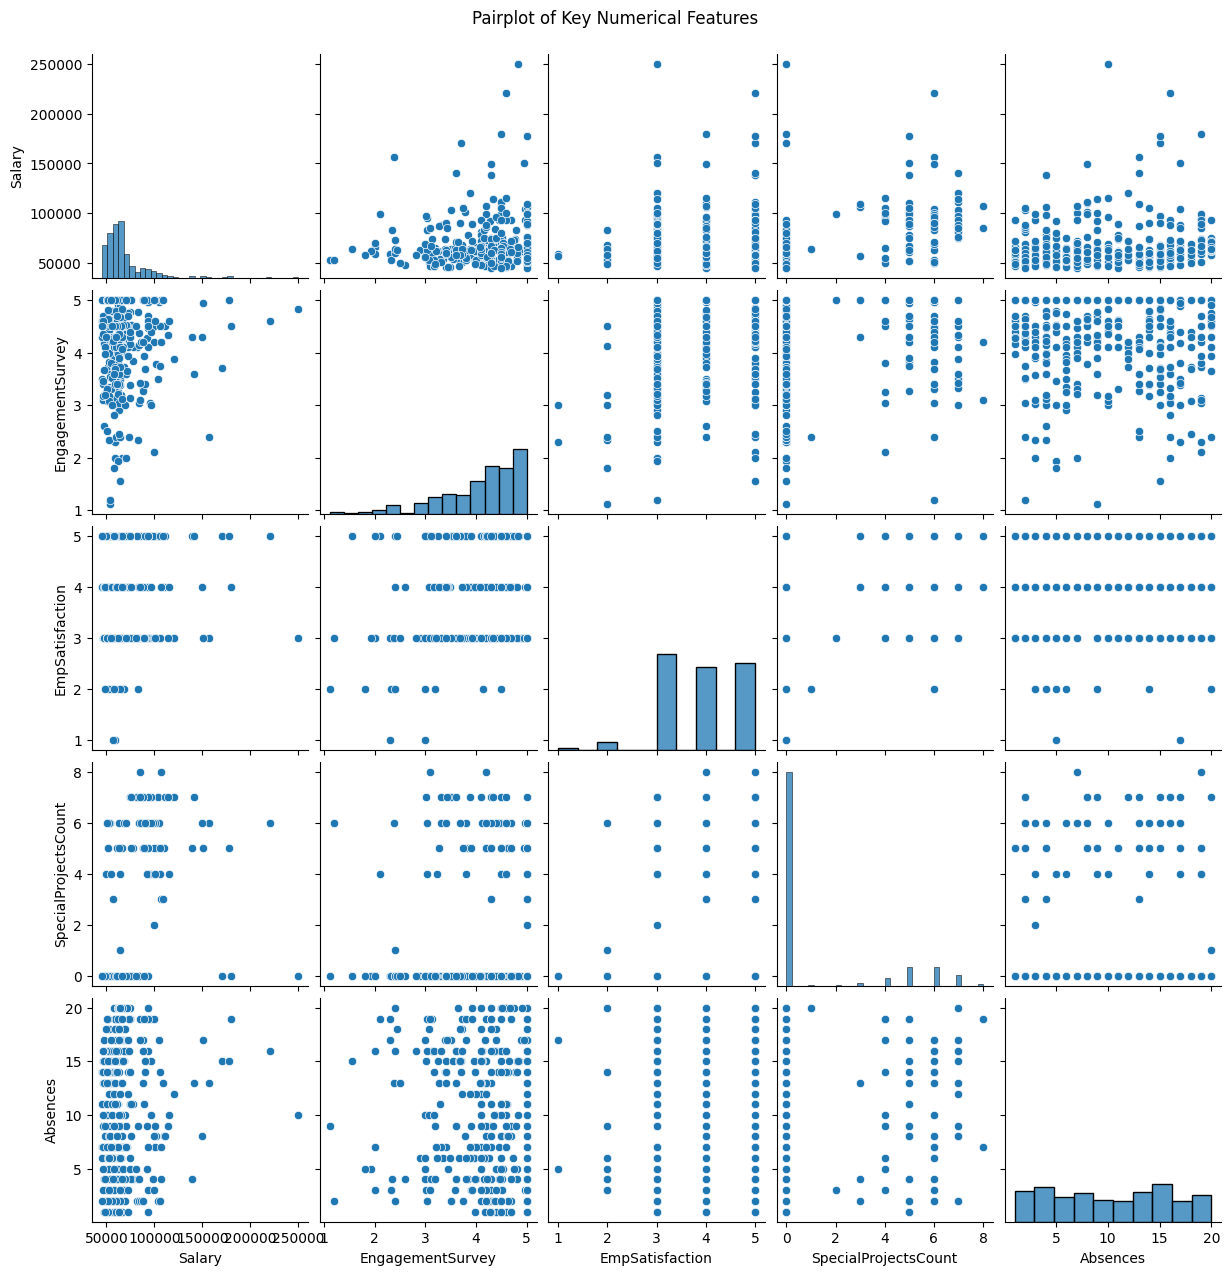

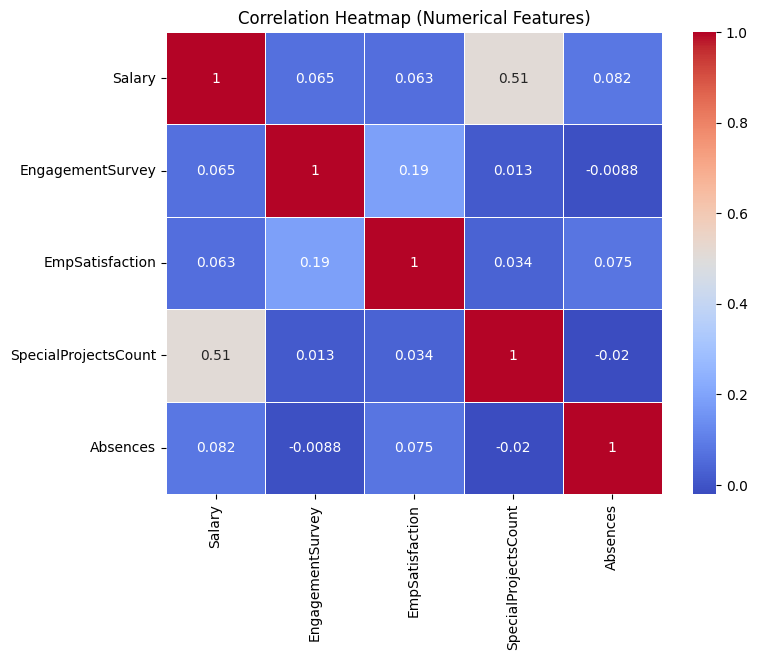

In [6]:
# b. Visualization — Pairplot and Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical features for visualization
num_features = ['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'Absences']

# Pairplot
sns.pairplot(df[num_features])
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [ ]:
#Observations:

#Salary shows mild correlation with EngagementSurvey and EmpSatisfaction.

#SpecialProjectsCount appears independent of salary but may relate to performance.

#Low correlation between absences and other variables — absenteeism likely not driven by satisfaction or pay.

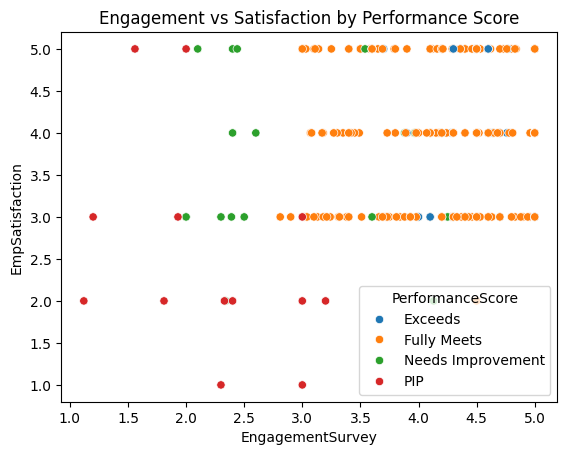

In [7]:
#c. Identify Relationships and Trends

sns.scatterplot(x='EngagementSurvey', y='EmpSatisfaction', data=df, hue='PerformanceScore')
plt.title("Engagement vs Satisfaction by Performance Score")
plt.show()

In [ ]:
#Observations:

#Positive relationship: employees with higher engagement often show higher satisfaction.

#“Exceeds Expectations” performers cluster in the upper-right region (high engagement & satisfaction).

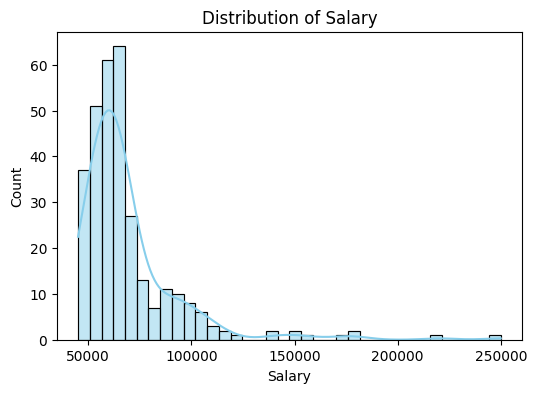

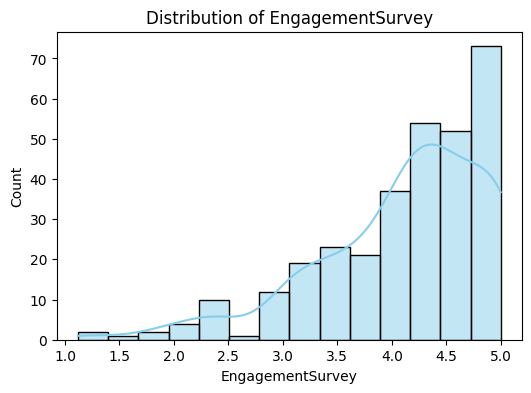

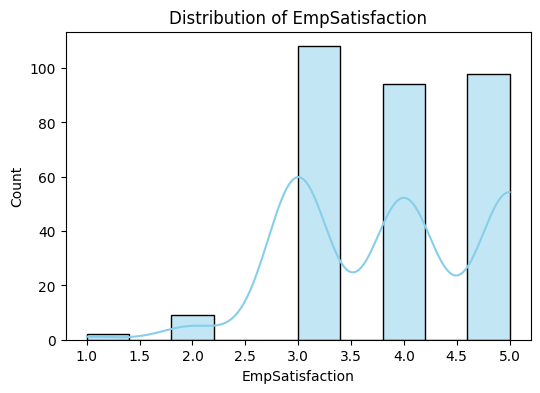

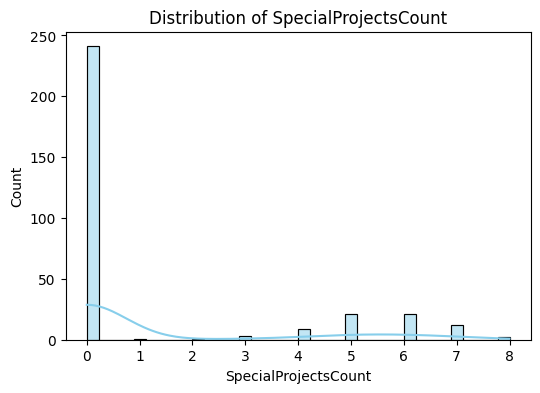

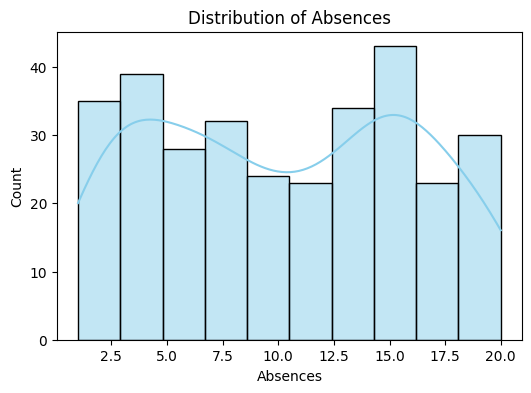

In [8]:
#d. Plot Histograms, Boxplots, Scatterplots
#Histogram

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

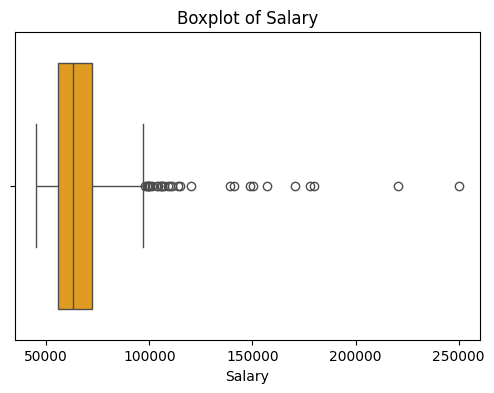

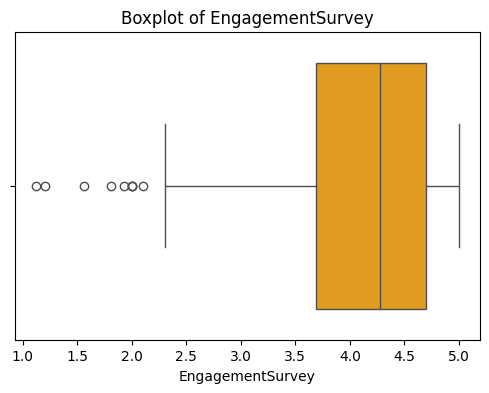

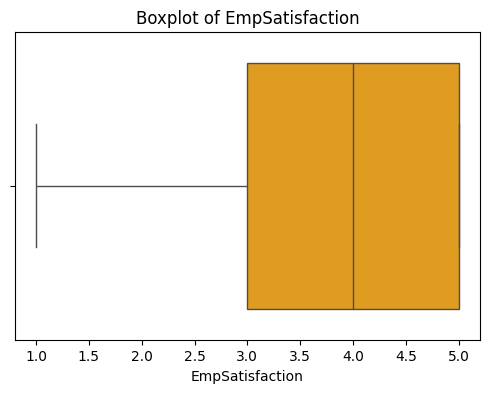

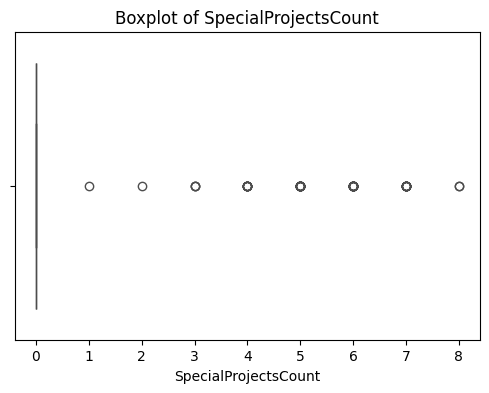

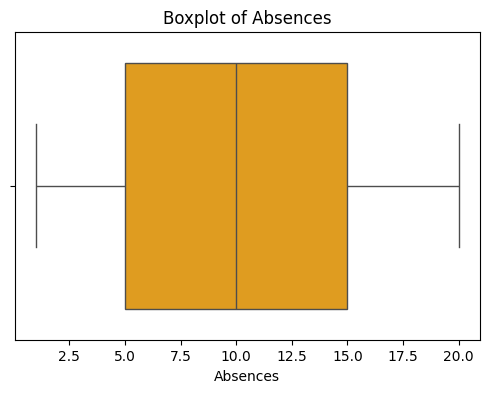

In [9]:
#Boxplots

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot of {col}")
    plt.show()

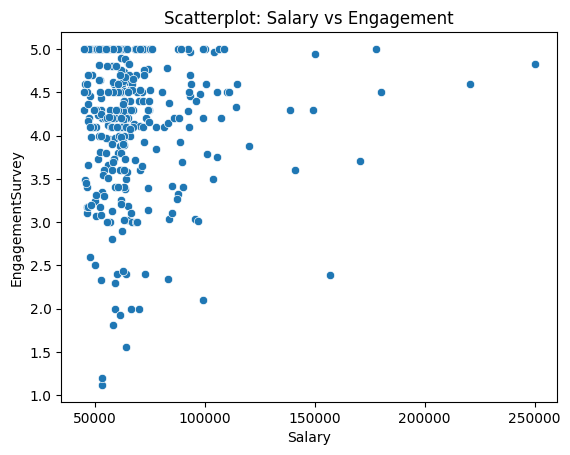

In [10]:
#Scatterplot

sns.scatterplot(x='Salary', y='EngagementSurvey', data=df)
plt.title("Scatterplot: Salary vs Engagement")
plt.show()


In [ ]:
#Observations:

#Salary distribution is right-skewed (more employees earn below 100k).

#EmpSatisfaction and EngagementSurvey show moderate variance but limited outliers.

#Some employees with high salary have moderate engagement — possible managerial roles.